In [23]:
#Author: Kristen
#Description: For now this is just random exploration (first program)
#Last Update Date: July 23rd
#Dependencies: None

In [24]:
set.seed(42)

In [25]:
#Install the packages if you have not already installed them on your computer
#install.packages("RandPro")
#install.packages("corrplot")
#install.packages("changepoint")
#install.packages("ecp")

In [26]:
#Libraries
library(corrplot)
library(caret)
library(RandPro)
library(dplyr)
library(changepoint)
library(ecp)

In [27]:
test <- read.csv("test.csv")
head(test, n= 2)

rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,⋯,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
3,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,⋯,0.4150,-0.391,-0.760,-0.119,0.178,0.101,0.809,-0.849,0.181,-0.0491
5,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,⋯,0.0878,-0.351,-0.699,0.123,0.123,0.694,-0.616,-0.848,0.185,-0.0439


In [28]:
train <- read.csv("train.csv")
head(train, n =2)

rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,⋯,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
7,STANDING,0.279,-0.0196,-0.110,-0.997,-0.967,-0.983,-0.997,-0.966,⋯,0.146,-0.217,-0.5640,-0.2130,-0.231,0.0146,-0.190,-0.852,0.182,-0.0430
11,STANDING,0.277,-0.0127,-0.103,-0.995,-0.973,-0.985,-0.996,-0.974,⋯,0.121,0.349,0.0577,0.0807,0.596,-0.4760,0.116,-0.852,0.188,-0.0347


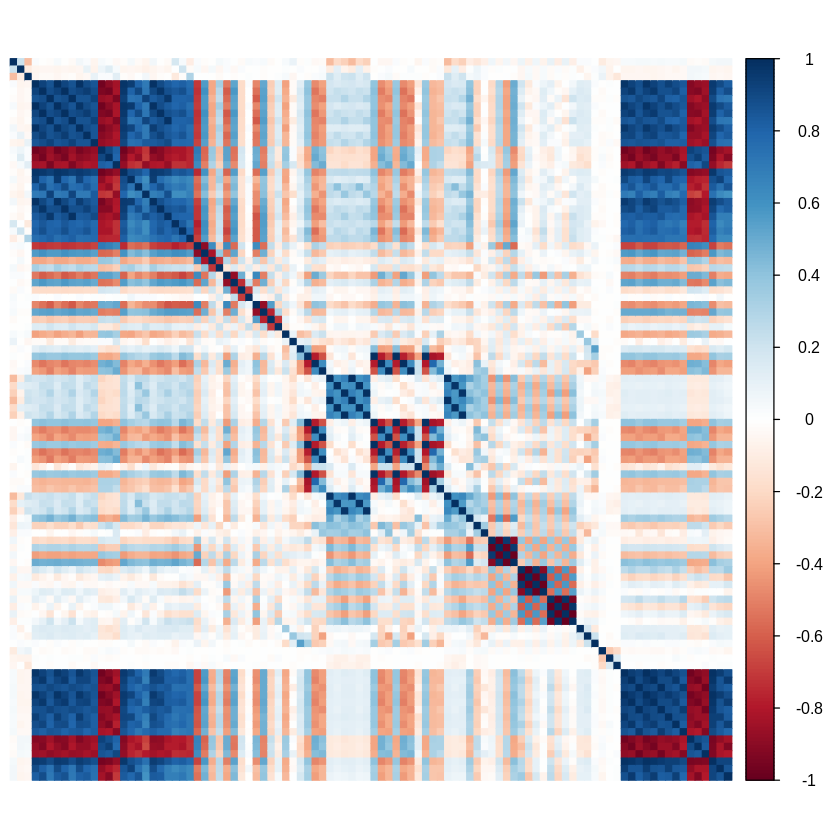

In [29]:
# Check some summary plots/stats
corTrain <- cor(train[, (3:100)])
corrplot(corTrain, method = 'color',tl.pos = "n")


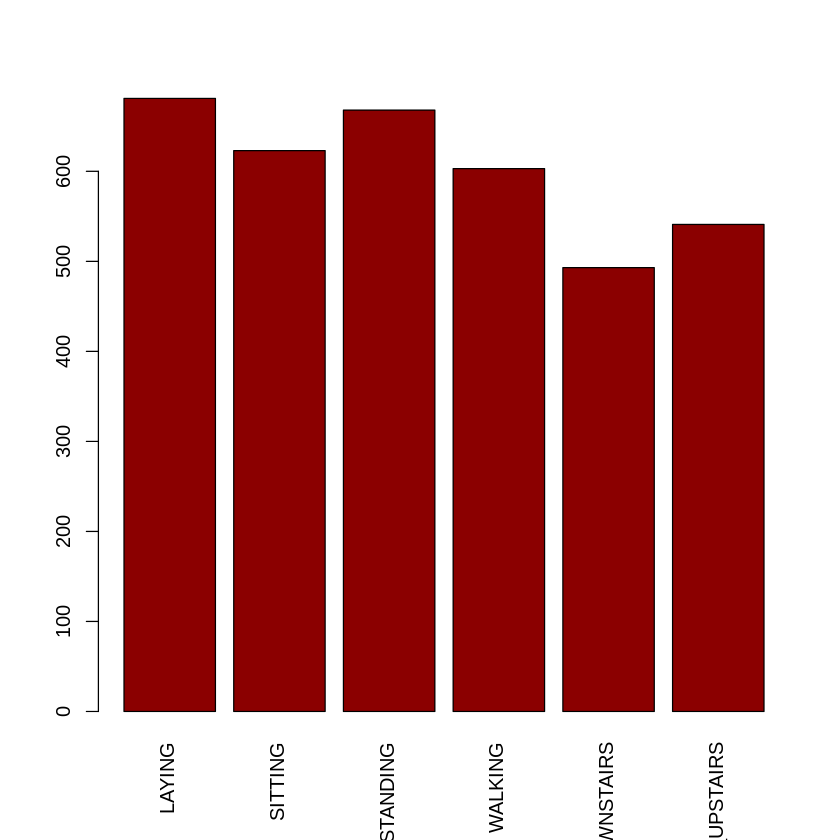

In [30]:
plot(train$activity, las = 3, col = 'darkred')

In [31]:
#This code block is from the clusterv source code fro random projections available at:
#http://homes.di.unimi.it/valenti/SW/clusterv-source/rp.R

# Random projections to a lower dimension subspace with the Achlioptas' projection matrix
# The projection is performed using a  projection matrix P s.t. Prob(P[i,j]=sqrt(3))=Prob(P[i,j]=-sqrt(3)=1/6;
# Prob(P[i,j]=0)=2/3
# Input:
# d : subspace dimension
# m : data matrix (rows are features and columns are examples)
# scaling : if TRUE (default) scaling is performed
# Output:
# data matrix (dimension d X ncol(m)) of the examples projected in a d-dimensional random subspace
Achlioptas.random.projection <- function(d=2, m, scaling=TRUE){
  d.original <- nrow(m);
  if (d >= d.original)
    stop("norm.random.projection: subspace dimension must be lower than space dimension", call.=FALSE);
  # Projection matrix
  P <- floor(runif(d*d.original,1,7)); # generate a vector 1 to 6 valued
  sqr3 <- sqrt(3);
  P[P==1] <- sqr3;
  P[P==6] <- -sqr3;
  P[P==2 | P==3 | P==4 | P==5] <- 0;
  P <- matrix(P, nrow=d);
  
  # random data projection
  if (scaling == TRUE)
    reduced.m <- sqrt(1/d) * (P%*%m)
  else 
    reduced.m <- P%*%m;;
  reduced.m 
}

# Prediction of the dimension of random projection we need to obtain a given distortion according to JL lemma
# Input:
# n : cardinality of the data
# epsilon : distortion (0 < epsilon <= 0.5)
# Output:
# minimum dimension
JL.predict.dim <- function(n, epsilon=0.5) {
  d <- 4 * (log(n) / epsilon^2);
  ceiling(d)
}

In [32]:
n = length(train$activity)-2
JL.predict.dim(n, epsilon = 0.5)

[1] 132

In [33]:
trainMatrix <- t(data.matrix(train[,-(1:2)]))
rpResults<- data.frame(t(Achlioptas.random.projection(d = 3, trainMatrix, scaling = TRUE)))
head(rpResults)

X1,X2,X3
-2.56284,-5.06506,-25.35097
-2.80182,-2.74477,-26.73867
-5.70720,-4.43522,-22.22490
1.40127,-4.84300,-25.59307
-2.59708,-4.35027,-26.46122
-6.63617,-3.55107,-22.84730


In [ ]:
devisiveResults = e.divisive(data.matrix(rpResults), min.size = 5, sig.lvl = 0.2)

In [13]:
#hard code results in to avoid rerunning above code
devisiveResults = c(1, 25, 43, 52, 59, 83, 101, 109, 114, 141, 169, 199, 234, 268, 294, 311, 322, 347, 384, 396, 417, 450, 473, 501, 514, 523, 549, 573, 599, 605, 623, 650, 668, 681, 693, 706, 722, 743, 757, 769, 779, 807, 820, 836, 872, 880, 896, 926, 945, 978, 989, 1006, 1029, 1048, 1073, 1107, 1136, 1166, 1199, 1233, 1266, 1314, 1342, 1374, 1384, 1390, 1399, 1425, 1436, 1459, 1510, 1532, 1566, 1586, 1627, 1647, 1684, 1713, 1745, 1774, 1810, 1847, 1888, 1923, 1962, 1989, 2014, 2025, 2036, 2058, 2099, 2121, 2154, 2168, 2178, 2187, 2219, 2239, 2264, 2297, 2315, 2342, 2358, 2383, 2414, 2436, 2449, 2469, 2510, 2541, 2569, 2597, 2628, 2654, 2666, 2673, 2681, 2712, 2731, 2744, 2767, 2799, 2816, 2840, 2864, 2887, 2913, 2935, 2962, 2988, 3016, 3041, 3066, 3079, 3097, 3104, 3130, 3145, 3159, 3191, 3212, 3221, 3239, 3255, 3290, 3317, 3349, 3375, 3389, 3419, 3445, 3467, 3491, 3512, 3522, 3555, 3587, 3610)

In [14]:
# Get actual changepoints
train$changepoint[1] = TRUE
for (x in 2:length(train$activity)){
train$changepoint[x] = (train$activity[x] != train$activity[x-1])
}
pointsChange <- which(train$changepoint, arr.ind = TRUE)


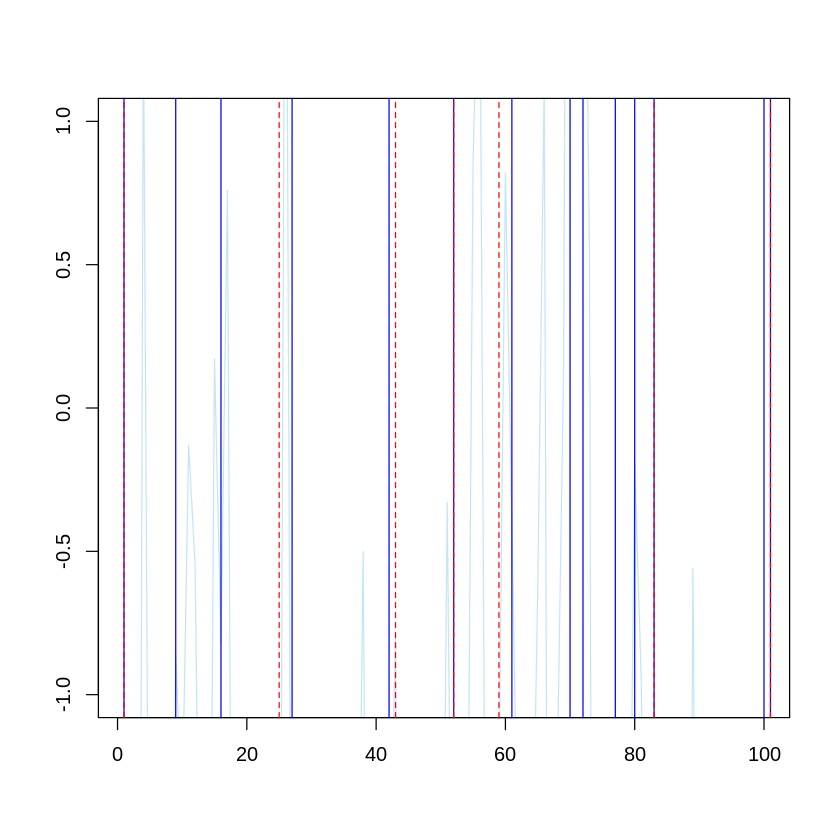

In [19]:
predictedCP = devisiveResults
actualCP = pointsChange
plot(rpResults[1:100,'X1'],type="l", col=alpha("skyblue", 0.5), ann=FALSE,ylim=range(-1:1)) 
#lines(rpResults[1:100,'X2'],type="l", col=alpha("orange",0.5), ann=FALSE) 
#lines(rpResults[1:100,'X3'],type="l", col=alpha("green", 0.5), ann=FALSE) 
abline(v = actualCP, col = "blue")
abline(v = predictedCP, col = "red", lty = 2)